<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bar" data-toc-modified-id="Bar-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bar</a></span></li><li><span><a href="#Trajectory" data-toc-modified-id="Trajectory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trajectory</a></span></li></ul></div>

# Setup

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from scipy.stats import gmean

In [129]:
case = pd.read_excel('case1B.xlsx')

In [153]:
caseLong['adjusted_performance (%)'] = [(1 + r / 100) for r in caseLong['performance (%)'].values]

# Preformance

## Bar

In [161]:
def gmean_reversed(x):
    return (gmean(x) - 1)*100

In [167]:
caseLong

,company,performance (%),adjusted_performance (%)
0,3008,2.5500,1.025500
1,3008,20.6600,1.206600
2,3008,4.1200,1.041200
3,3008,-10.6300,0.893700
4,3008,-4.0400,0.959600
...,...,...,...
1318,2412,3.7567,1.037567
1319,2412,0.5555,1.005555
1320,2412,1.5866,1.015866
1321,2412,4.2129,1.042129


(-5.0, 5.0)

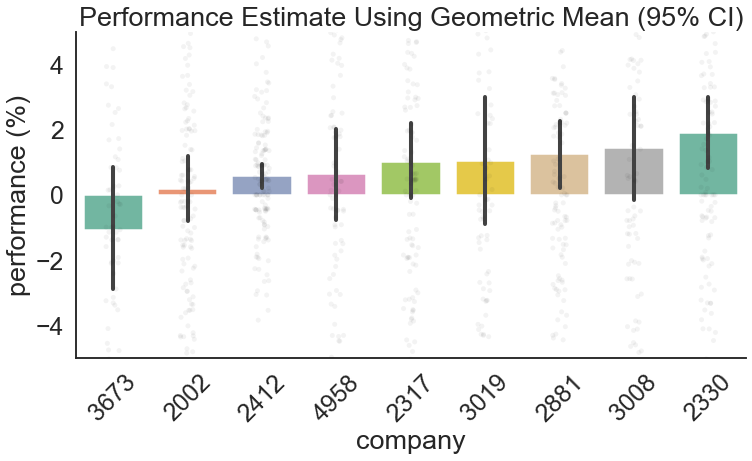

In [173]:
caseLong = case.iloc[:, 2:-1].melt(var_name = 'company', value_name = 'performance (%)')
caseLong['adjusted_performance (%)'] = [(1 + r / 100) for r in caseLong['performance (%)'].values]
rank = caseLong.groupby('company')['adjusted_performance (%)'].apply(gmean_reversed).sort_values().index
plt.figure(figsize=(12, 6))
sns.set_theme('talk', 'white', font_scale=1.5)
_ = sns.barplot(x = 'company', y = 'adjusted_performance (%)', estimator=gmean_reversed, palette='Set2', order=rank, ci=95, data=caseLong)
_ = sns.stripplot(x = 'company', y = 'performance (%)', color='k', order=rank, alpha=0.05, data=caseLong)
plt.xticks(rotation=45)
plt.title('Performance Estimate Using Geometric Mean (95% CI)')
sns.despine()
_.set_ylim(-5, 5)

(-5.0, 5.0)

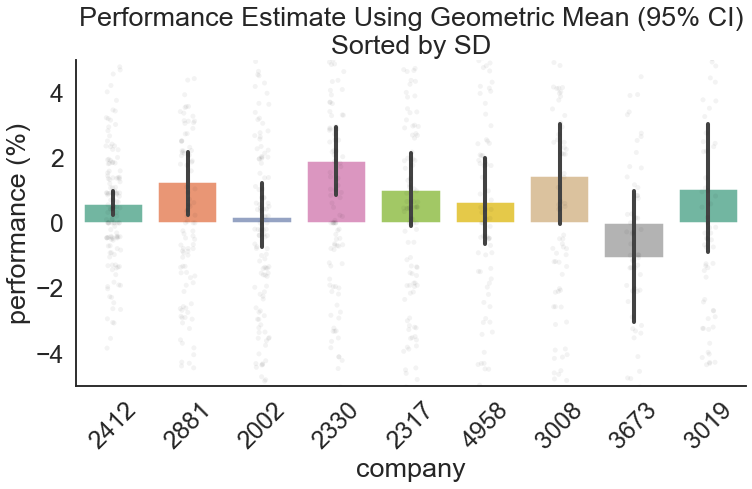

In [180]:
caseLong = case.iloc[:, 2:-1].melt(var_name = 'company', value_name = 'performance (%)')
caseLong['adjusted_performance (%)'] = [(1 + r / 100) for r in caseLong['performance (%)'].values]
rank = caseLong.groupby('company')['adjusted_performance (%)'].apply(np.std).sort_values().index
plt.figure(figsize=(12, 6))
sns.set_theme('talk', 'white', font_scale=1.5)
_ = sns.barplot(x = 'company', y = 'adjusted_performance (%)', estimator=gmean_reversed, palette='Set2', order=rank, ci=95, data=caseLong)
_ = sns.stripplot(x = 'company', y = 'performance (%)', color='k', order=rank, alpha=0.05, data=caseLong)
plt.xticks(rotation=45)
plt.title('Performance Estimate Using Geometric Mean (95% CI)\nSorted by SD')
sns.despine()
_.set_ylim(-5, 5)

(-5.0, 5.0)

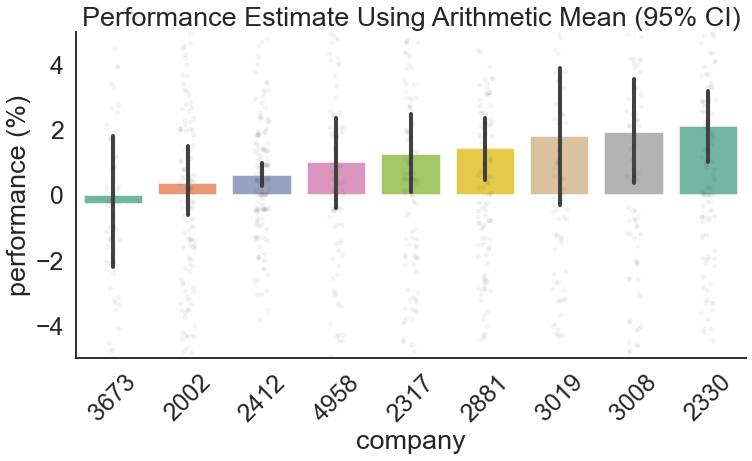

In [174]:
caseLong = case.iloc[:, 2:-1].melt(var_name = 'company', value_name = 'performance (%)')
rank = caseLong.groupby('company').mean().sort_values(by='performance (%)').index
plt.figure(figsize=(12, 6))
sns.set_theme('talk', 'white', font_scale=1.5)
_ = sns.barplot(x = 'company', y = 'performance (%)', palette='Set2', order=rank, ci=95, data=caseLong)
_ = sns.stripplot(x = 'company', y = 'performance (%)', color='k', order=rank, alpha=0.05, data=caseLong)
plt.xticks(rotation=45)
plt.title('Performance Estimate Using Arithmetic Mean (95% CI)')
sns.despine()
_.set_ylim(-5, 5)

(-10.0, 10.0)

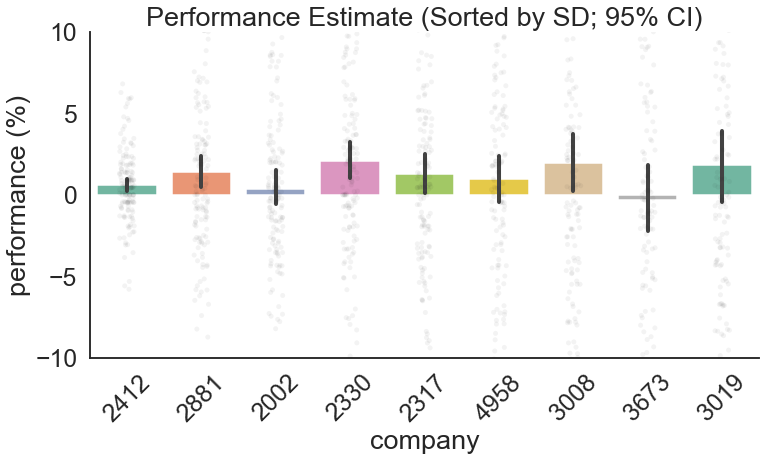

In [103]:
caseLong = case.iloc[:, 2:-1].melt(var_name = 'company', value_name = 'performance (%)')
rank = caseLong.groupby('company').std().sort_values(by='performance (%)').index
plt.figure(figsize=(12, 6))
sns.set_theme('talk', 'white', font_scale=1.5)
_ = sns.barplot(x = 'company', y = 'performance (%)', palette='Set2', order=rank, ci=95, data=caseLong)
_ = sns.stripplot(x = 'company', y = 'performance (%)', color='k', order=rank, alpha=0.05, data=caseLong)
plt.title('Performance Estimate (Sorted by SD; 95% CI)')
plt.xticks(rotation=45)
sns.despine()
_.set_ylim(-10, 10)

## Trajectory

In [130]:
caseLong = case.iloc[:, 2:-1].melt(var_name = 'company', value_name = 'performance (%)')
caseLong['time (month)'] = [i for i in range(147)] * 9
caseLong

,company,performance (%),time (month)
0,3008,2.5500,0
1,3008,20.6600,1
2,3008,4.1200,2
3,3008,-10.6300,3
4,3008,-4.0400,4
...,...,...,...
1318,2412,3.7567,142
1319,2412,0.5555,143
1320,2412,1.5866,144
1321,2412,4.2129,145


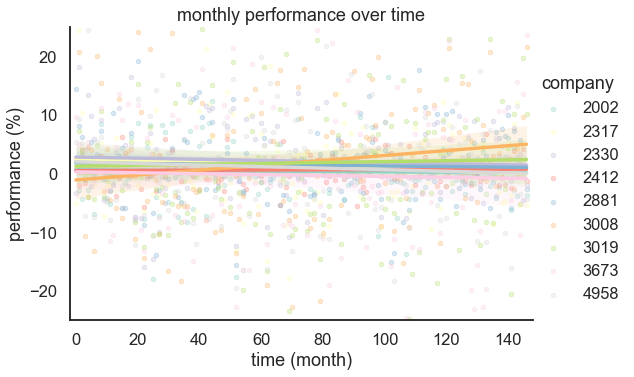

In [146]:
sns.set_theme('talk', 'white', font_scale=1)
_ = sns.lmplot(x = 'time (month)', y = 'performance (%)', hue='company', aspect=1.5, palette='Set3', scatter_kws={'s':20, 'alpha':0.3}, ci=95, data=caseLong)
_.set(xlim = (-2, 148), ylim = (-25, 25), title = 'monthly performance over time')

In [148]:
linear_trend_df = pd.DataFrame()

for i, c in enumerate(case.columns[2:-1]):
    comp = caseLong.query('company == @c')
    corr = pearsonr(comp['time (month)'], comp['performance (%)'])
    linear_trend_df = pd.concat([linear_trend_df, pd.DataFrame({'company': c, 'r': corr[0], 'p-value': corr[1]}, index=[i])])
    
linear_trend_df.to_csv('linear_trend.csv')

# Correlations

<AxesSubplot:title={'center':'pairwise correlations among companys'}>

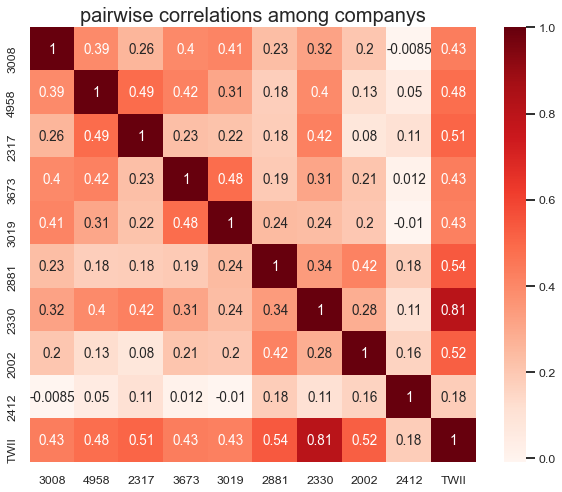

In [38]:
plt.figure(figsize=(10, 8))
sns.set_theme('talk', 'white', font_scale=0.75)
plt.title('pairwise correlations among companys', fontdict={'size': 20})
sns.heatmap(case.corr(), cmap='Reds', annot=True)

# Betas

In [54]:
betas = pd.DataFrame()
for c in case.columns[2:]:
    model = LinearRegression()
    model.fit(case.iloc[:, -1].values.reshape(-1, 1), case.loc[:, c].values.reshape(-1, 1)) # x: TWII, y: company
    betas[c] = model.coef_[0]
betas

,3008,4958,2317,3673,3019,2881,2330,2002,2412,TWII
0,1.075564,0.997359,0.902982,1.31931,1.337384,0.778746,1.332474,0.83437,0.097621,1.0
